<a href="https://www.kaggle.com/code/vijays140291/hospital-stay?scriptVersionId=193952209" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [54]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [7]:
#loading the dataset
df=pd.read_csv('/kaggle/input/av-healthcare-analytics-ii/healthcare/train_data.csv')
df_test=pd.read_csv('/kaggle/input/av-healthcare-analytics-ii/healthcare/test_data.csv')


In [8]:
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [9]:
#checking for missing values in the dataset
df.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [10]:
#creating a function to impute missing values
def impute_missing_values(data,columns):
    for column in columns:
        data[column]=data[column].fillna(data[column].mean())
    

In [11]:
impute_columns=['Bed Grade','City_Code_Patient']

impute_missing_values(df,impute_columns)

In [12]:
df.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [15]:
#checking for data types for each column
df.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [17]:
#creating function to get unique values in each column

def get_categorical_unique(data):
    categorical_columns=[column for column in data.dtypes.index if data.dtypes[column]=='object']
    categorical_uniques={column:data[column].unique() for column in categorical_columns}
    return categorical_uniques

In [18]:
get_categorical_unique(df)

{'Hospital_type_code': array(['c', 'e', 'b', 'a', 'f', 'd', 'g'], dtype=object),
 'Hospital_region_code': array(['Z', 'X', 'Y'], dtype=object),
 'Department': array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
        'surgery'], dtype=object),
 'Ward_Type': array(['R', 'S', 'Q', 'P', 'T', 'U'], dtype=object),
 'Ward_Facility_Code': array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object),
 'Type of Admission': array(['Emergency', 'Trauma', 'Urgent'], dtype=object),
 'Severity of Illness': array(['Extreme', 'Moderate', 'Minor'], dtype=object),
 'Age': array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
        '11-20', '0-10', '91-100'], dtype=object),
 'Stay': array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
        'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)}

In [32]:
#if there is any order than ordinal encoding otherwise onehot_encoding
onehot_columns=['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code']
ordinal_columns=['Type of Admission','Severity of Illness','Age','Stay']

In [29]:
def onehot_encoding(df,columns):
    for column in columns:
        dummies=pd.get_dummies(df[column])
        dummies=dummies.astype(int)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [39]:
#encoding non ordinal columns
df=onehot_encoding(df,onehot_columns)

In [40]:
get_categorical_unique(df)

{'Type of Admission': array(['Emergency', 'Trauma', 'Urgent'], dtype=object),
 'Severity of Illness': array(['Extreme', 'Moderate', 'Minor'], dtype=object),
 'Age': array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
        '11-20', '0-10', '91-100'], dtype=object),
 'Stay': array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
        'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)}

In [42]:
sorted(df['Age'].unique())

['0-10',
 '11-20',
 '21-30',
 '31-40',
 '41-50',
 '51-60',
 '61-70',
 '71-80',
 '81-90',
 '91-100']

In [43]:
sorted(df['Stay'].unique())

['0-10',
 '11-20',
 '21-30',
 '31-40',
 '41-50',
 '51-60',
 '61-70',
 '71-80',
 '81-90',
 '91-100',
 'More than 100 Days']

In [46]:
#encoding ordinal columns
df['Type of Admission']=df['Type of Admission'].replace({'Emergency':0,'Trauma':1,'Urgent':2})
df['Severity of Illness']=df['Severity of Illness'].replace({'Minor':0,'Moderate':1,'Extreme':2})
df['Age']=df['Age'].replace({'0-10':0,
 '11-20':1,
 '21-30':2,
 '31-40':3,
 '41-50':4,
 '51-60':5,
 '61-70':6,
 '71-80':7,
 '81-90':8,
 '91-100':9})
df['Stay']=df['Stay'].replace({'0-10':0,
 '11-20':1,
 '21-30':2,
 '31-40':3,
 '41-50':4,
 '51-60':5,
 '61-70':6,
 '71-80':7,
 '81-90':8,
 '91-100':9,
 'More than 100 Days':10})

In [48]:
df.dtypes

case_id                                int64
Hospital_code                          int64
City_Code_Hospital                     int64
Available Extra Rooms in Hospital      int64
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                      int64
Severity of Illness                    int64
Visitors with Patient                  int64
Age                                    int64
Admission_Deposit                    float64
Stay                                   int64
a                                      int64
b                                      int64
c                                      int64
d                                      int64
e                                      int64
f                                      int64
g                                      int64
X                                      int64
Y                                      int64
Z         

In [49]:
#checking for missing values
df.isna().sum()

case_id                              0
Hospital_code                        0
City_Code_Hospital                   0
Available Extra Rooms in Hospital    0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
a                                    0
b                                    0
c                                    0
d                                    0
e                                    0
f                                    0
g                                    0
X                                    0
Y                                    0
Z                                    0
TB & Chest disease                   0
anesthesia                           0
gynecology               

In [ ]:
#spliting the data
x

In [56]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(222906, 39)
(95532, 39)
(222906,)
(95532,)


In [58]:
#splitting the data between target and feature
y=df['Stay']
x=df.drop('Stay',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123)

scaler=StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.fit_transform(x_train),index=x_train.index,columns=x_train.columns)
x_test=pd.DataFrame(scaler.fit_transform(x_test),index=x_test.index,columns=x_test.columns)

In [59]:
#training the LogisticModel
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.38909475359041995

53110     1
60920     2
167080    2
128759    5
56519     3
         ..
192476    1
17730     7
28030     2
277869    2
249342    0
Name: Stay, Length: 222906, dtype: int64

In [64]:
y_train.unique()

array([ 1,  2,  5,  3,  7,  0,  6,  4,  8, 10,  9])

In [66]:
#tensorflow
inputs=tf.keras.Input(shape=(39,))
x=tf.keras.layers.Dense(16,activation='relu')(inputs)
x=tf.keras.layers.Dense(16,activation='relu')(x)
outputs=tf.keras.layers.Dense(11,activation='softmax')(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=10
history=model.fit(x_train,y_train,validation_split=0.2,batch_size=batch_size,epochs=epochs,verbose=0)

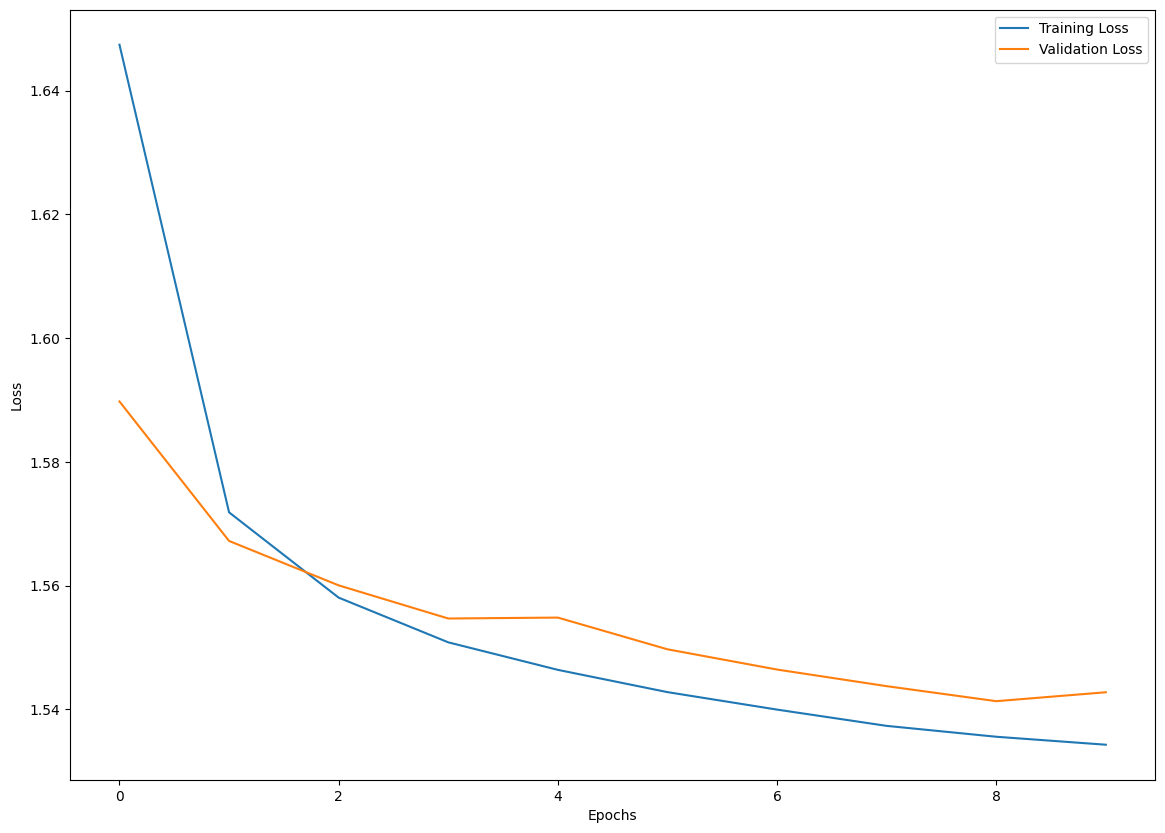

In [67]:
plt.figure(figsize=(14,10))
plt.plot(range(epochs),history.history['loss'],label='Training Loss')
plt.plot(range(epochs),history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [68]:
model.evaluate(x_test,y_test)

2986/2986 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4090 - loss: 1.5403


[1.5401716232299805, 0.40941256284713745]